# "Universal" netCDF reader

## Model dataset in image format

In [1]:
%ls SURFACEMODEL/

200001/  200003/  200005/  200007/  200009/  200011/
200002/  200004/  200006/  200008/  200010/  200012/


In [2]:
%ls SURFACEMODEL/200001/

LIS_HIST_200001010000.d01.nc*  LIS_HIST_200001170000.d01.nc*
LIS_HIST_200001020000.d01.nc*  LIS_HIST_200001180000.d01.nc*
LIS_HIST_200001030000.d01.nc*  LIS_HIST_200001190000.d01.nc*
LIS_HIST_200001040000.d01.nc*  LIS_HIST_200001200000.d01.nc*
LIS_HIST_200001050000.d01.nc*  LIS_HIST_200001210000.d01.nc*
LIS_HIST_200001060000.d01.nc*  LIS_HIST_200001220000.d01.nc*
LIS_HIST_200001070000.d01.nc*  LIS_HIST_200001230000.d01.nc*
LIS_HIST_200001080000.d01.nc*  LIS_HIST_200001240000.d01.nc*
LIS_HIST_200001090000.d01.nc*  LIS_HIST_200001250000.d01.nc*
LIS_HIST_200001100000.d01.nc*  LIS_HIST_200001260000.d01.nc*
LIS_HIST_200001110000.d01.nc*  LIS_HIST_200001270000.d01.nc*
LIS_HIST_200001120000.d01.nc*  LIS_HIST_200001280000.d01.nc*
LIS_HIST_200001130000.d01.nc*  LIS_HIST_200001290000.d01.nc*
LIS_HIST_200001140000.d01.nc*  LIS_HIST_200001300000.d01.nc*
LIS_HIST_200001150000.d01.nc*  LIS_HIST_200001310000.d01.nc*
LIS_HIST_200001160000.d01.nc*  LIS_RST_NOAH*


In [3]:
!ncdump -h SURFACEMODEL/200001/LIS_HIST_200001010000.d01.nc | head -n 11

netcdf LIS_HIST_200001010000.d01 {
dimensions:
	east_west = 207 ;
	north_south = 168 ;
	time = 1 ;
	SnowIce_profiles = 3 ;
	SoilMoist_profiles = 4 ;
	SoilTemp_profiles = 4 ;
	SmLiqFrac_profiles = 4 ;
	SnowTProf_profiles = 3 ;
	SnowLiq_profiles = 3 ;


In [4]:
!ncdump -h SURFACEMODEL/200001/LIS_HIST_200001010000.d01.nc | grep float | head

	float lat(north_south, east_west) ;
	float lon(north_south, east_west) ;
	float time(time) ;
	float Swnet_tavg(north_south, east_west) ;
	float Lwnet_tavg(north_south, east_west) ;
	float Qle_tavg(north_south, east_west) ;
	float Qh_tavg(north_south, east_west) ;
	float Qg_tavg(north_south, east_west) ;
	float Evap_tavg(north_south, east_west) ;
	float Qs_tavg(north_south, east_west) ;


In [5]:
!ncdump -h SURFACEMODEL/200001/LIS_HIST_200001010000.d01.nc | grep SoilMoist

	SoilMoist_profiles = 4 ;
	float SoilMoist_inst(SoilMoist_profiles, north_south, east_west) ;
		SoilMoist_inst:units = "m^3 m-3" ;
		SoilMoist_inst:standard_name = "soil_moisture_content" ;
		SoilMoist_inst:long_name = "soil moisture content" ;
		SoilMoist_inst:scale_factor = 1.f ;
		SoilMoist_inst:add_offset = 0.f ;
		SoilMoist_inst:missing_value = -9999.f ;
		SoilMoist_inst:_FillValue = -9999.f ;
		SoilMoist_inst:vmin = -1.e+15f ;
		SoilMoist_inst:vmax = 1.e+15f ;


## Problems

- nested directories
- no standardized path names
- no standardized variable names
- no standardized dimension names
- no time dimension in images
- level dimension in variable of interest

## DirectoryImageReader

In [6]:
from nc_image_reader.readers import DirectoryImageReader

reader = DirectoryImageReader(
    "SURFACEMODEL",
    "SoilMoist_inst",
    pattern="LIS_HIST_*.nc",
    fmt="LIS_HIST_%Y%m%d%H%M.d01.nc",
    latdim="north_south",
    londim="east_west",
    level={"SoilMoist_profiles": 0},
)

ReaderError: Inferred coordinate values for lat contain NaN! Try using the 'lat' and 'lon' keyword arguments to specify the coordinates directly.

In [9]:
!ncdump -h SURFACEMODEL/200001/LIS_HIST_200001010000.d01.nc | tail

		:history = "created on date: 2021-02-10T19:57:59.867" ;
		:references = "Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007" ;
		:conventions = "CF-1.6" ;
		:comment = "website: http://lis.gsfc.nasa.gov/" ;
		:MAP_PROJECTION = "EQUIDISTANT CYLINDRICAL" ;
		:SOUTH_WEST_CORNER_LAT = 29.875f ;
		:SOUTH_WEST_CORNER_LON = -11.375f ;
		:DX = 0.25f ;
		:DY = 0.25f ;
}


In [10]:
reader = DirectoryImageReader(
    "SURFACEMODEL",
    "SoilMoist_inst",
    pattern="LIS_HIST_*.nc",
    fmt="LIS_HIST_%Y%m%d%H%M.d01.nc",
    latdim="north_south",
    londim="east_west",
    level={"SoilMoist_profiles": 0},
    lat=(29.875, 0.25),
    lon=(-11.375, 0.25)
)

In [11]:
reader.read("2000-01-10")

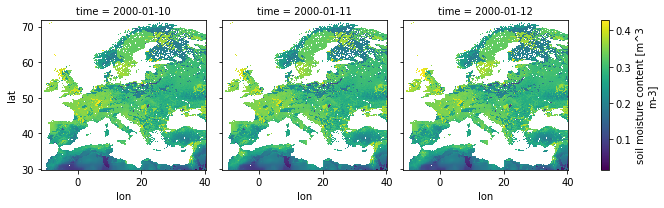

In [12]:
reader.read_block("2000-01-10", "2000-01-12").plot(col="time")

## Image to timeseries

- either from Python code
- or from CLI with `repurpose_images`

In [13]:
!repurpose_images --help

usage: repurpose_images [-h] --parameter PARAMETER [--pattern PATTERN]
                        [--time_fmt TIME_FMT]
                        [--time_regex_pattern TIME_REGEX_PATTERN]
                        [--latname LATNAME] [--latdim LATDIM]
                        [--lonname LONNAME] [--londim LONDIM]
                        [--locdim LOCDIM] [--lat START STEP]
                        [--lon START STEP]
                        [--bbox MIN_LON MIN_LAT MAX_LON MAX_LAT]
                        [--landmask [FILENAME:]VARNAME]
                        [--level DIMNAME:IDX [DIMNAME:IDX ...]]
                        [--cellsize CELLSIZE] [--imgbuffer IMGBUFFER]
                        dataset_root output_root start end

Converts data to time series format.

positional arguments:
  dataset_root          Path where the data is stored, either a directory or a
                        netCDF file
  output_root           Path where the output should be stored.
  start                 Startdate. 

In [14]:
%%bash

time repurpose_images\
    --parameter SoilMoist_inst\
    --pattern 'LIS_HIST_*.nc'\
    --time_fmt "LIS_HIST_%Y%m%d%H%M.d01.nc"\
    --latdim north_south\
    --londim east_west\
    --lat 29.875 0.25\
    --lon -11.375 0.25\
    --level "SoilMoist_profiles:0"\
    --\
    "SURFACEMODEL"\
    "SURFACEMODEL_timeseries"\
    "2000-01-01"\
    "2000-01-10"

Converting data from 2000-01-01 00:00:00 to 2000-01-10 00:00:00 into directory SURFACEMODEL_timeseries.



real	0m2,342s
user	0m2,692s
sys	0m1,765s


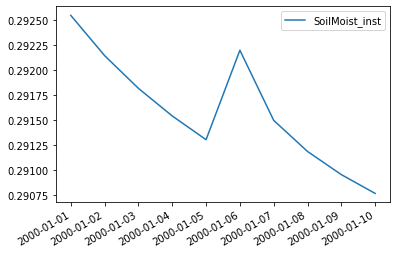

In [20]:
from nc_image_reader.readers import GriddedNcOrthoMultiTs

reader = GriddedNcOrthoMultiTs("SURFACEMODEL_timeseries")
ts = reader.read(16.375, 48.125)
ts.plot();

## Alternative: Creating transposed stack

In [16]:
%%bash

time transpose_images\
    --parameter SoilMoist_inst\
    --pattern 'LIS_HIST_*.nc'\
    --time_fmt "LIS_HIST_%Y%m%d%H%M.d01.nc"\
    --latdim north_south\
    --londim east_west\
    --lat 29.875 0.25\
    --lon -11.375 0.25\
    --level "SoilMoist_profiles:0"\
    --\
    "SURFACEMODEL"\
    "SURFACEMODEL_stacked.nc"\
    "2000-01-01"\
    "2000-01-10"

Converting data from 2000-01-01 00:00:00 to 2000-01-10 00:00:00 into directory SURFACEMODEL_stacked.nc.


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]

real	0m1,807s
user	0m2,155s
sys	0m1,774s


In [17]:
!ncdump -h SURFACEMODEL_stacked.nc

netcdf SURFACEMODEL_stacked {
dimensions:
	lat = 168 ;
	lon = 207 ;
	time = 10 ;
variables:
	float SoilMoist_inst(lat, lon, time) ;
		string SoilMoist_inst:units = "m^3 m-3" ;
		string SoilMoist_inst:standard_name = "soil_moisture_content" ;
		string SoilMoist_inst:long_name = "soil moisture content" ;
		SoilMoist_inst:vmin = -1.e+15f ;
		SoilMoist_inst:vmax = 1.e+15f ;
	float lat(lat) ;
	float lon(lon) ;
	float time(time) ;
		string time:units = "days since 1900-01-01 00:00:00" ;

// global attributes:
		:missing_value = -9999.f ;
		:NUM_SOIL_LAYERS = 4 ;
		:SOIL_LAYER_THICKNESSES = 10.f, 30.f, 60.f, 100.f ;
		string :title = "LIS land surface model output" ;
		string :institution = "NASA GSFC" ;
		string :source = "" ;
		string :history = "created on date: 2021-02-10T20:31:30.426" ;
		string :references = "Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007" ;
		string :conventions = "CF-1.6" ;
		string :comment = "website: http://lis.gsfc.nasa.gov/" ;
		string :MAP_PROJECTION = "EQUID

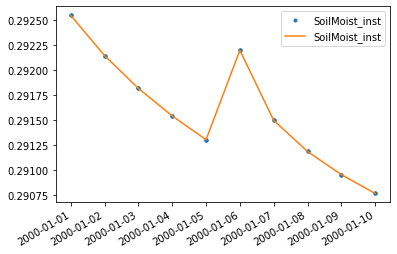

In [19]:
from nc_image_reader.readers import XarrayTSReader
import matplotlib.pyplot as plt

stacked_reader = XarrayTSReader("SURFACEMODEL_stacked.nc", "SoilMoist_inst")
ts_from_stacked = reader.read(16.375, 48.125)
ts.plot(marker=".", ls="", label="from repurposed")
ax = plt.gca()
ts_from_stacked.plot(ax=ax, label="from stacked")
plt.legend();

# Performance

## Transposing vs. repurposing

## Timeseries access